#
# Previous Codes:
#

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

a = sns.load_dataset('titanic')
a

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
a.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
a[(a['pclass'] == 1) & (a['sex'] == 'male')]['age'].mean()

41.28138613861386

In [2]:
def impute_age(pclass, sex):
    
    if sex == 'male':
        
        if pclass == 1:
            return a[(a['pclass'] == 1) & (a['sex'] == 'male')]['age'].mean()
        elif pclass == 2:
            return a[(a['pclass'] == 2) & (a['sex'] == 'male')]['age'].mean()
        elif pclass == 3:
            return a[(a['pclass'] == 3) & (a['sex'] == 'male')]['age'].mean()
        
    else: 
        
        if pclass == 1:
            return a[(a['pclass'] == 1) & (a['sex'] != 'male')]['age'].mean()
        elif pclass == 2:
            return a[(a['pclass'] == 2) & (a['sex'] != 'male')]['age'].mean()
        elif pclass == 3:
            return a[(a['pclass'] == 3) & (a['sex'] != 'male')]['age'].mean()
        
a['age'] = a.apply( lambda x: impute_age(x['pclass'], x['sex']) if np.isnan(x['age']) else x['age'], axis = 1)

In [3]:
titanic = a.drop(['deck', 'embark_town', 'alive'], axis = 1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,True


In [4]:
titanic['age'] = titanic['age'].astype('int')
titanic['fare'] = titanic['fare'].astype('int')
#titanic['fare'] = titanic['pclass'].astype('int')

In [5]:
genders = {'male' : 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)


In [6]:
titanic['adult_male'] = titanic['adult_male'].map({True: 1, False: 0})


In [7]:
titanic['alone'] = titanic['alone'].map({True: 1, False: 0})

In [8]:
titanic['embarked'].fillna('Southampton', inplace = True)
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    int64   
 11  alone       891 non-null    int64   
dtypes: category(1), int32(2), int64(7), object(2)
memory usage: 70.7+ KB


In [9]:
#titanic['embarked'].isnull().sum()
#titanic.info()
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

###
## One-Hot Encoding:
###

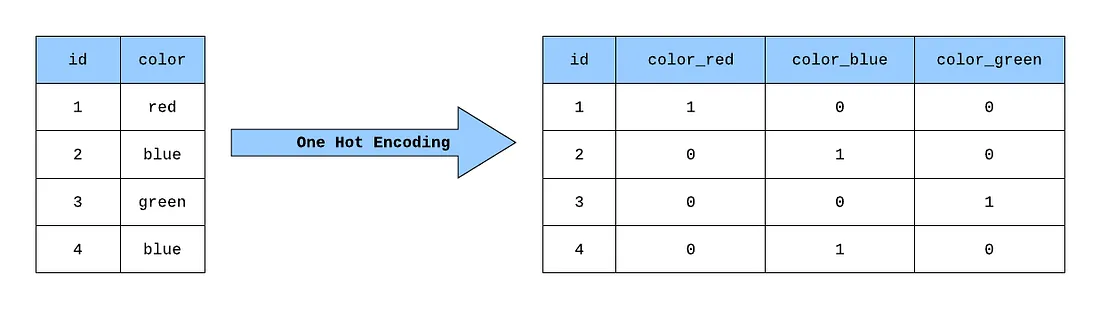

In [28]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,1,0
1,1,1,1,38,1,0,71,C,First,woman,0,0
2,1,3,1,26,0,0,7,S,Third,woman,0,1
3,1,1,1,35,1,0,53,S,First,woman,0,0
4,0,3,0,35,0,0,8,S,Third,man,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,S,Second,man,1,1
887,1,1,1,19,0,0,30,S,First,woman,0,1
888,0,3,1,21,1,2,23,S,Third,woman,0,0
889,1,1,0,26,0,0,30,C,First,man,1,1


###
## pd.get_dummies
###

In [22]:
titanic_ = pd.get_dummies(titanic, columns = ['embarked', 'who', 'pclass']).drop('embarked_Southampton', axis = 1)
titanic_.drop(['class'], axis = 1, inplace = True)
titanic_

,survived,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,pclass_1,pclass_2,pclass_3
0,0,0,22,1,0,7,1,0,False,False,True,False,True,False,False,False,True
1,1,1,38,1,0,71,0,0,True,False,False,False,False,True,True,False,False
2,1,1,26,0,0,7,0,1,False,False,True,False,False,True,False,False,True
3,1,1,35,1,0,53,0,0,False,False,True,False,False,True,True,False,False
4,0,0,35,0,0,8,1,1,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,0,0,13,1,1,False,False,True,False,True,False,False,True,False
887,1,1,19,0,0,30,0,1,False,False,True,False,False,True,True,False,False
888,0,1,21,1,2,23,0,0,False,False,True,False,False,True,False,False,True
889,1,0,26,0,0,30,1,1,True,False,False,False,True,False,True,False,False


###
## Converting to Boolean
###

In [23]:
titanic_['embarked_C'] = titanic_['embarked_C'].map({True: 1, False: 0})
titanic_['embarked_Q'] = titanic_['embarked_Q'].map({True: 1, False: 0})
titanic_['embarked_S'] = titanic_['embarked_S'].map({True: 1, False: 0})

titanic_['who_child'] = titanic_['who_child'].map({True: 1, False: 0})
titanic_['who_man'] = titanic_['who_man'].map({True: 1, False: 0})
titanic_['who_woman'] = titanic_['who_woman'].map({True: 1, False: 0})

titanic_['pclass_1'] = titanic_['pclass_1'].map({True: 1, False: 0})
titanic_['pclass_2'] = titanic_['pclass_2'].map({True: 1, False: 0})
titanic_['pclass_3'] = titanic_['pclass_3'].map({True: 1, False: 0})


###
## Dataset Now
###

In [32]:
titanic_

,survived,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,pclass_1,pclass_2,pclass_3
0,0,0,22,1,0,7,1,0,0,0,1,0,1,0,0,0,1
1,1,1,38,1,0,71,0,0,1,0,0,0,0,1,1,0,0
2,1,1,26,0,0,7,0,1,0,0,1,0,0,1,0,0,1
3,1,1,35,1,0,53,0,0,0,0,1,0,0,1,1,0,0
4,0,0,35,0,0,8,1,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,0,0,13,1,1,0,0,1,0,1,0,0,1,0
887,1,1,19,0,0,30,0,1,0,0,1,0,0,1,1,0,0
888,0,1,21,1,2,23,0,0,0,0,1,0,0,1,0,0,1
889,1,0,26,0,0,30,1,1,1,0,0,0,1,0,1,0,0


###
## Droping Unnecasary Columns
###

In [183]:
titanic_.drop(['embarked_S', 'who_woman', 'pclass_3'], axis = 1, inplace = True)

###
## Dataset Now
###

In [184]:
titanic_

,survived,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,who_child,who_man,pclass_1,pclass_2
0,0,0,22,1,0,7.2500,1,0,0,0,0,1,0,0
1,1,1,38,1,0,71.2833,0,0,1,0,0,0,1,0
2,1,1,26,0,0,7.9250,0,1,0,0,0,0,0,0
3,1,1,35,1,0,53.1000,0,0,0,0,0,0,1,0
4,0,0,35,0,0,8.0500,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,0,0,13.0000,1,1,0,0,0,1,0,1
887,1,1,19,0,0,30.0000,0,1,0,0,0,0,1,0
888,0,1,21,1,2,23.4500,0,0,0,0,0,0,0,0
889,1,0,26,0,0,30.0000,1,1,1,0,0,1,1,0


###
## Saving Dataset as CSV File
###

In [185]:
titanic_.to_csv('titanic-1hotencoding.csv', index = False)

In [189]:
ttn = pd.read_csv('titanic-1hotencoding.csv')
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    int64  
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    int64  
 7   alone       891 non-null    int64  
 8   embarked_C  891 non-null    int64  
 9   embarked_Q  891 non-null    int64  
 10  who_child   891 non-null    int64  
 11  who_man     891 non-null    int64  
 12  pclass_1    891 non-null    int64  
 13  pclass_2    891 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.6 KB
